Import Libraries

# Import Libraries


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import statsmodels.stats.api as sms
import statsmodels.stats.outliers_influence as smso
import statsmodels.stats.diagnostic as smd
import statsmodels.graphics.gofplots as smg
import statsmodels.graphics.regressionplots as smgr
import statsmodels.stats.anova as sma
import statsmodels.stats.stattools as smst
import statsmodels.stats.weightstats as smw
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree,datasets,svm,kernel_approximation
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer


# Define Functions


In [98]:

def read_data(file):#Read the data from the Excel file
    data = pd.read_excel(file)
    return data

def descriptive_stats(data):#Make a function to Calculate the Average, Median, Standard Deviation, Coefficient of Variation, Minimum, and Maximum for each of the variables and store them in a dictionary
    stats = {}
    stats['Average'] = data.mean()
    stats['Median'] = data.median()
    stats['Standard Deviation'] = data.std()
    stats['Coefficient of Variation'] = data.std()/data.mean()
    stats['Minimum'] = data.min()
    stats['Maximum'] = data.max()
    return stats

#Create a function to add all the stats to a table and display it
def display_all_statistics(stats, stats2, stats3, stats4, stats5, stats6, stats7, stats8, stats9, stats10, stats11, stats12, stats13, stats14, stats15, stats16, stats17, stats18, stats19, stats20):
    stats_table = pd.DataFrame([stats, stats2, stats3, stats4, stats5, stats6, stats7, stats8, stats9, stats10, stats11, stats12, stats13, stats14, stats15, stats16, stats17, stats18, stats19, stats20], index=['FuelEconomyKmPerL', 'TonsActual', 'MaxSpeed', 'SpeedingTime', 'MaxBrake', 'ExcessiveBrakeTime', 'MaxAccel', 'ExcessiveAccelTime', 'MaxRPM', 'ExcessiveRPMTime', 'ExcessiveIdleTime', 'StandingTime_s', 'ElevGain_m', 'ElevLost_m', 'MaxSlopeasc', 'MaxSlopedesc', 'AveSlopeasc', 'AveSlopedesc', 'ElevGain_mPerKm', 'ElevLost_mPerKm'])
    return stats_table

def linear_regression(data, x, y):#LinearRegression
    #Create a linear regression model
    model = smf.ols(formula = y + '~' + x, data=data)
    results = model.fit()
    #Print the summary of the model
    print(results.summary())
    #Plot the data and the regression line
    plt.scatter(data[x], data[y])
    plt.plot(data[x], results.predict(), color='red')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    return results

def mean_squared_error2(y, results):#Create a function to calculate the mean squared error y and result values
    #Calculate the mean squared error
    mse = np.mean((y - results.predict())**2)
    print('Mean Squared Error: ', mse)
    return mse
P = 0.5609338378652248


# Question 1
Read the data into a suitable structure with a field for each of the columns and determine the list of fields and number of entries per field. (3)

In [99]:
data = read_data('FleetTripRecords.xlsx')#Call the read_data function
data.head()

,VehicleID,DriverID,TripStart,TripEnd,TripDistance,Odometer,MaxSpeed,SpeedingTime,SpeedingOccurs,MaxBrake,...,ElevLost_m,MaxSlopeasc,MaxSlopedesc,AveSlopeasc,AveSlopedesc,VehicleDescription,VehicleMake,FuelEconomyKmPerL,ElevGain_mPerKm,ElevLost_mPerKm
0,30044,1747,2016-05-12 13:15:07,2016-05-12 14:16:14,55.1,265792.3,85,0,0,9,...,-524,0.159,-0.143,0.019,-0.018,F009-TGA 26.440 (071 682 2294),TGA 26.440,4.865342,10.834846,-9.509982
1,30048,2219,2016-01-07 05:29:34,2016-01-07 08:40:29,217.0,139269.0,85,527,64,5,...,-1418,0.065,-0.109,0.008,-0.013,F038-TGA 26.440 (072 063 1099),TGA 26.440,4.078334,4.456221,-6.534562
2,30048,2219,2016-01-07 05:29:34,2016-01-07 08:40:29,217.0,139269.0,85,527,64,5,...,-1418,0.065,-0.109,0.008,-0.013,F038-TGA 26.440 (072 063 1099),TGA 26.440,4.078334,4.456221,-6.534562
3,1367,1522,2016-04-21 18:33:40,2016-04-21 20:48:56,122.2,178022.4,83,8,1,4,...,-335,0.052,-0.024,0.008,-0.005,F318-TGS 26.440 (082 562 9186),TGS 26.440,6.209981,3.895254,-2.741408
4,30366,2218,2015-07-07 11:43:32,2015-07-07 15:30:03,273.4,49598.3,85,0,0,9,...,-344,0.014,-0.010,0.005,-0.003,F374-TGS 26.440 (082 944 2415),TGS 26.440,4.523569,2.699342,-1.258230


# Question 2
2.	Sort the entries based on the TripStart Date.  Display a part of the sorted data. (2)   

In [100]:
data = data.sort_values(by=['TripStart'])#Sort the entries based on the TripStart Date.  Display a part of the sorted data.
data.head()

,VehicleID,DriverID,TripStart,TripEnd,TripDistance,Odometer,MaxSpeed,SpeedingTime,SpeedingOccurs,MaxBrake,...,ElevLost_m,MaxSlopeasc,MaxSlopedesc,AveSlopeasc,AveSlopedesc,VehicleDescription,VehicleMake,FuelEconomyKmPerL,ElevGain_mPerKm,ElevLost_mPerKm
360,30370,1757,2015-03-02 15:30:52,2015-03-02 17:34:47,116.9,25744.3,86,0,0,6,...,-1873,0.069,-0.084,0.025,-0.026,F379-TGS 26.440 (079 875 7597),TGS 26.440,1.768720,12.925577,-16.022241
6689,30050,1195,2015-03-02 16:39:56,2015-03-02 20:29:31,243.8,70360.6,84,0,0,6,...,-1531,0.107,-0.065,0.018,-0.012,F048-TGA 26.440 (082 957 0511),TGA 26.440,2.125953,10.209188,-6.279737
7069,30183,889,2015-03-02 16:46:34,2015-03-02 19:52:12,216.2,43499.2,81,0,0,3,...,-1418,0.065,-0.109,0.008,-0.013,F336-TGS 26.440 (082 775 3277),TGS 26.440,2.063036,4.472710,-6.558742
5897,30056,1749,2015-03-02 17:04:07,2015-03-02 19:44:16,171.1,54219.7,85,0,0,7,...,-990,0.089,-0.026,0.017,-0.010,F054-TGS 26.480 (082 944 2218),TGS 26.480,2.075726,8.176505,-5.786090
2931,30116,1724,2015-03-03 03:56:02,2015-03-03 07:52:35,271.9,65021.6,86,0,0,5,...,-1604,0.065,-0.104,0.007,-0.012,F154-TGS 26.440 (082 856 9409),TGS 26.440,2.086467,4.104450,-5.899228


# Question 3
3.	Calculate and display in a table a set of descriptive statistics (Average, Median, Standard Deviation, Coefficient of Variation, Minimum, Maximum) over all trips for the following trip variables (the first variable can be considered as trip outcome and the remaining ones as trip inputs or explanatory variables): (6)

In [101]:
#Data_list to store the data for each variable
data_list = ['FuelEconomyKmPerL', 'TonsActual', 'MaxSpeed', 'SpeedingTime', 'MaxBrake', 'ExcessiveBrakeTime', 'MaxAccel', 'ExcessiveAccelTime', 'MaxRPM', 'ExcessiveRPMTime', 'ExcessiveIdleTime', 'StandingTime_s', 'ElevGain_m', 'ElevLost_m', 'MaxSlopeasc', 'MaxSlopedesc', 'AveSlopeasc', 'AveSlopedesc', 'ElevGain_mPerKm', 'ElevLost_mPerKm']
statistics_array = np.zeros(len(data_list))#Create a stats array as long as the data_list
#use the statistics_array to store the stats for each variable
statistics_array = [descriptive_stats(data['FuelEconomyKmPerL']), descriptive_stats(data['TonsActual']), descriptive_stats(data['MaxSpeed']), descriptive_stats(data['SpeedingTime']), descriptive_stats(data['MaxBrake']), descriptive_stats(data['ExcessiveBrakeTime']), descriptive_stats(data['MaxAccel']), descriptive_stats(data['ExcessiveAccelTime']), descriptive_stats(data['MaxRPM']), descriptive_stats(data['ExcessiveRPMTime']), descriptive_stats(data['ExcessiveIdleTime']), descriptive_stats(data['StandingTime_s']), descriptive_stats(data['ElevGain_m']), descriptive_stats(data['ElevLost_m']), descriptive_stats(data['MaxSlopeasc']), descriptive_stats(data['MaxSlopedesc']), descriptive_stats(data['AveSlopeasc']), descriptive_stats(data['AveSlopedesc']), descriptive_stats(data['ElevGain_mPerKm']), descriptive_stats(data['ElevLost_mPerKm'])]
#Display the stats for each variable 
display_all_statistics(statistics_array[0], statistics_array[1], statistics_array[2], statistics_array[3], statistics_array[4], statistics_array[5], statistics_array[6], statistics_array[7], statistics_array[8], statistics_array[9], statistics_array[10], statistics_array[11], statistics_array[12], statistics_array[13], statistics_array[14], statistics_array[15], statistics_array[16], statistics_array[17], statistics_array[18], statistics_array[19])

,Average,Median,Standard Deviation,Coefficient of Variation,Minimum,Maximum
FuelEconomyKmPerL,2.063252,2.026624,0.432404,0.209574,1.184306,7.342451
TonsActual,29.010760,34.000000,8.692052,0.299615,1.000000,39.980000
MaxSpeed,85.291177,85.000000,1.738828,0.020387,75.000000,98.000000
SpeedingTime,22.618820,0.000000,172.392573,7.621643,0.000000,5621.000000
MaxBrake,5.281480,5.000000,1.588567,0.300781,2.000000,27.000000
ExcessiveBrakeTime,0.002049,0.000000,0.097061,47.378475,0.000000,6.000000
MaxAccel,2.741601,3.000000,0.737794,0.269111,2.000000,24.000000
ExcessiveAccelTime,0.007785,0.000000,0.357669,45.944825,0.000000,25.000000
MaxRPM,1930.483474,1900.000000,203.042050,0.105177,1500.000000,7600.000000
ExcessiveRPMTime,0.008877,0.000000,0.466091,52.503407,0.000000,28.000000


# Question 4
4.	Calculate the correlation coefficient between FuelEconomyKmPerL and each of the other explanatory variables in 3 above.  Compile a table with correlation coefficients sorted from largest to smallest absolute value

In [102]:
correlation_array = np.zeros(len(data_list)-1)#Create a correlation array as long as the data_list excluding FuelEconomyKmPerL
#use the correlation_array to store the absolute correlation for each variable
correlation_array = [abs(data['FuelEconomyKmPerL'].corr(data['TonsActual'])), abs(data['FuelEconomyKmPerL'].corr(data['MaxSpeed'])), abs(data['FuelEconomyKmPerL'].corr(data['SpeedingTime'])), abs(data['FuelEconomyKmPerL'].corr(data['MaxBrake'])), abs(data['FuelEconomyKmPerL'].corr(data['ExcessiveBrakeTime'])), abs(data['FuelEconomyKmPerL'].corr(data['MaxAccel'])), abs(data['FuelEconomyKmPerL'].corr(data['ExcessiveAccelTime'])), abs(data['FuelEconomyKmPerL'].corr(data['MaxRPM'])), abs(data['FuelEconomyKmPerL'].corr(data['ExcessiveRPMTime'])), abs(data['FuelEconomyKmPerL'].corr(data['ExcessiveIdleTime'])), abs(data['FuelEconomyKmPerL'].corr(data['StandingTime_s'])), abs(data['FuelEconomyKmPerL'].corr(data['ElevGain_m'])), abs(data['FuelEconomyKmPerL'].corr(data['ElevLost_m'])), abs(data['FuelEconomyKmPerL'].corr(data['MaxSlopeasc'])), abs(data['FuelEconomyKmPerL'].corr(data['MaxSlopedesc'])), abs(data['FuelEconomyKmPerL'].corr(data['AveSlopeasc'])), abs(data['FuelEconomyKmPerL'].corr(data['AveSlopedesc'])), abs(data['FuelEconomyKmPerL'].corr(data['ElevGain_mPerKm'])), abs(data['FuelEconomyKmPerL'].corr(data['ElevLost_mPerKm']))]
correlation_table_data_df = pd.DataFrame({'Variable': data_list[1:], 'Correlation': correlation_array})#Create a correlation table
correlation_table_data = correlation_table_data_df.sort_values(by=['Correlation'], ascending=False)#Sort the correlation table from highest to lowest
correlation_table_data#Display the correlation table


,Variable,Correlation
11,ElevGain_m,0.618712
17,ElevGain_mPerKm,0.598477
15,AveSlopeasc,0.581496
13,MaxSlopeasc,0.573266
12,ElevLost_m,0.449610
16,AveSlopedesc,0.428250
18,ElevLost_mPerKm,0.370680
14,MaxSlopedesc,0.322803
7,MaxRPM,0.279349
0,TonsActual,0.175922


# Question 5
5.	Select, and display in a table, explanatory variables to be used as inputs to a model for the prediction of FuelEconomyKmPerL by applying the following criteria:
•	Explanatory variables must be selected starting with those that display the largest correlation coefficient with FuelEconomyKmPerL.
•	The absolute value of the correlation coefficient between any selected explanatory variable and FuelEconomyKmPerL must be at least 0.1. 
•	The absolute value between any new explanatory variable and any already selected explanatory variable may not be larger than 0.4 (5)


In [103]:

selected_variables = []#Create a list of explanatory variables
for i in range(len(correlation_table_data)):
    if correlation_table_data.iloc[i,1] >= 0.1:
        selected_variables.append(correlation_table_data.iloc[i,0])
        for j in range(len(selected_variables)):
            if abs(data[selected_variables[j]].corr(data[correlation_table_data.iloc[i,0]])) < correlation_table_data.iloc[0,1]-P:        # Determine if the statement is > 0.4
                selected_variables.remove(correlation_table_data.iloc[i,0])
                break
explanatory_variables_table = correlation_table_data[correlation_table_data['Variable'].isin(selected_variables)]#Create a correlation table for the explanatory variables
explanatory_variables_table#Display the correlation table for the explanatory variables

,Variable,Correlation
11,ElevGain_m,0.618712
17,ElevGain_mPerKm,0.598477
15,AveSlopeasc,0.581496
13,MaxSlopeasc,0.573266
12,ElevLost_m,0.449610
16,AveSlopedesc,0.428250
18,ElevLost_mPerKm,0.370680
14,MaxSlopedesc,0.322803
7,MaxRPM,0.279349


# Question 6

6.	Using the above selected explanatory variables, extract a linear regression model to predict FuelEconomyKmPerL in terms of the selected explanatory variables, by implementing the following steps:

•	Divide the data set into a training set, consisting of the first 70% of trip start date sorted data, and a test set, consisting of the remaining 30% of the data.
•	Extract the linear regression model coefficients and compile a table with regression coefficients. 
•	Calculate the RMSE (root mean square error) of the model relative to the standard deviation of the target value.
•	Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for both the training and test sets. (10)


In [104]:
training_data_set = data.iloc[0:int(len(data)*0.7),:]#Create a training set consisting of 70% of the trip start date sorted data
test_set = data.iloc[int(len(data)*0.7):,:]#Create a test set consisting of 30% of the trip start date sorted data

model = LinearRegression()#Create a linear regression model
model.fit(training_data_set[selected_variables], training_data_set['FuelEconomyKmPerL'])#Fit the model to the training set
regression_coefficients_table = pd.DataFrame({'Variable': selected_variables, 'Regression Coefficient': model.coef_})#Create a table with regression coefficients

RMSE_training = np.sqrt(mean_squared_error(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables])))/np.std(training_data_set['FuelEconomyKmPerL'])#Calculate the RMSE of the model relative to the standard deviation of the target value for the training set
RMSE_test = np.sqrt(mean_squared_error(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables])))/np.std(test_set['FuelEconomyKmPerL'])#Calculate the RMSE of the model relative to the standard deviation of the target value for the test set
print('RMSE of the model relative to the standard deviation of the target value for the training set: ', RMSE_training)#display the RMSE of the model relative to the standard deviation of the target value for the training set
print('RMSE of the model relative to the standard deviation of the target value for the test set: ', RMSE_test)#display the RMSE of the model relative to the standard deviation of the target value for the test set

correlation_training = np.corrcoef(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set
correlation_test = np.corrcoef(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set
print('Correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set: ', correlation_training)#display the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set
print('Correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set: ', correlation_test)#display the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set
regression_coefficients_table#Display the regression coefficients table


RMSE of the model relative to the standard deviation of the target value for the training set:  0.6526288720357474
RMSE of the model relative to the standard deviation of the target value for the test set:  0.7967235716169049
Correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set:  0.7576777384781396
Correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set:  0.6163367745878026


,Variable,Regression Coefficient
0,ElevGain_m,-0.000207
1,ElevGain_mPerKm,-0.005067
2,AveSlopeasc,-34.294883
3,MaxSlopeasc,1.582203
4,ElevLost_m,-0.000109
5,AveSlopedesc,65.272139
6,ElevLost_mPerKm,-0.144058
7,MaxSlopedesc,-0.109400
8,MaxRPM,-0.000698


7.	Repeat the exercise in 6 above by using a multi-layer perceptron neural network (MLP NN) instead of linear regression.  
•	The NN must contain one hidden layer.  
•	Determine the optimal number of hidden layer nodes by varying this parameter by factors of 2 from 2 to 32. Display in each case the correlation coefficient between actual and predicted fuel economy over the training and test sets.
•	Compare the two modelling techniques in terms of their ability to correctly predict FuelEconomyKmPerL. (10)


In [105]:

training_set_correlation_list = []#Create a list to store the correlation coefficients for the training set
test_set_correlation_list = []#Create a list to store the correlation coefficients for the test set
hidden_layer_nodes_list = []#Create a list to store the number of hidden layer nodes
for hidden_layer_nodes in range(2, 33, 2):#Use a for loop to iterate through the number of hidden layer nodes
    model = MLPRegressor(hidden_layer_sizes=(hidden_layer_nodes,), max_iter=1000)#Create a multi-layer perceptron neural network
    model.fit(training_data_set[selected_variables], training_data_set['FuelEconomyKmPerL'])#Fit the model to the training set
    training_data_set_correlation = np.corrcoef(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set
    test_dat_set_correlation = np.corrcoef(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]))[0,1] #Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set
    training_set_correlation_list.append(training_data_set_correlation) #Append the correlation coefficients and the number of hidden layer nodes to the lists
    test_set_correlation_list.append(test_dat_set_correlation)
    hidden_layer_nodes_list.append(hidden_layer_nodes)
correlation_coefficients = pd.DataFrame({'HiddenLayerNodes': hidden_layer_nodes_list, 'TrainingSetCorrelation': training_set_correlation_list, 'TestSetCorrelation': test_set_correlation_list})#Create a table with the correlation coefficients and the number of hidden layer nodes
display(correlation_coefficients)#Display the table with the correlation coefficients and the number of hidden layer nodes
model = LinearRegression()#Create a linear regression model to compare the models 
model.fit(training_data_set[selected_variables], training_data_set['FuelEconomyKmPerL'])#Fit the model to the training set
training_data_set_correlation = np.corrcoef(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set
test_dat_set_correlation = np.corrcoef(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set
print('Linear regression:')#Display the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set
print('Training set: ' + str(training_data_set_correlation))
print('Test set: ' + str(test_dat_set_correlation))

model = MLPRegressor(hidden_layer_sizes=(16,), max_iter=1000)#Create a multi-layer perceptron neural network
model.fit(training_data_set[selected_variables], training_data_set['FuelEconomyKmPerL'])#Fit the model to the training set
training_data_set_correlation = np.corrcoef(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set
test_dat_set_correlation = np.corrcoef(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set
print('Multi-layer perceptron neural network:')#Display the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set
print('Training set: ' + str(training_data_set_correlation))
print('Test set: ' + str(test_dat_set_correlation))


,HiddenLayerNodes,TrainingSetCorrelation,TestSetCorrelation
0,2,0.006776,0.002122
1,4,0.093760,0.186559
2,6,0.610378,0.393720
3,8,0.188239,0.256211
4,10,0.453850,0.496860
5,12,0.171748,0.248943
6,14,0.341546,0.329372
7,16,0.253670,0.297313
8,18,0.422927,0.442696
9,20,0.287424,0.318432


Linear regression:
Training set: 0.7576777384781396
Test set: 0.6163367745878026
Multi-layer perceptron neural network:
Training set: 0.47712511039069744
Test set: 0.5055915107540924


8.	Plot the model outputs against the target value for both models and for both training and test sets.  Comment on the ability of the models to predict the target value. (2) 

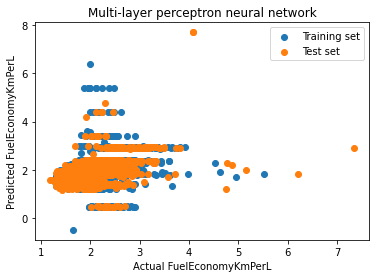

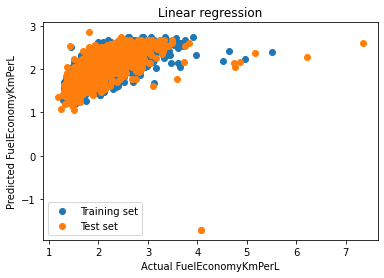

In [106]:
test_dat_set_correlation = np.corrcoef(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set
plt.scatter(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]), label='Training set')#Plot the model outputs against the target value for the training set
plt.scatter(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]), label='Test set')#Plot the model outputs against the target value for the test set
plt.legend()#Add a legend
plt.title('Multi-layer perceptron neural network')#Add a title
plt.xlabel('Actual FuelEconomyKmPerL')#Add a label to the x-axis
plt.ylabel('Predicted FuelEconomyKmPerL')#Add a label to the y-axis
plt.show()#Display the plot

model = LinearRegression()#Create a linear regression model
model.fit(training_data_set[selected_variables], training_data_set['FuelEconomyKmPerL'])#Fit the model to the training set
training_data_set_correlation = np.corrcoef(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set
test_dat_set_correlation = np.corrcoef(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set
plt.scatter(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]), label='Training set')#Plot the model outputs against the target value for the training set
plt.scatter(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]), label='Test set')#Plot the model outputs against the target value for the test set
plt.legend()#Add a legend
plt.title('Linear regression')#Add a title
plt.xlabel('Actual FuelEconomyKmPerL')#Add a label to the x-axis
plt.ylabel('Predicted FuelEconomyKmPerL')#Add a label to the y-axis
plt.show()#Display the plot


9.	For each input variable, construct a graph that displays the model input vs the model output over the complete range of input variable values that appear in the data set.  In each case the other input variables must be kept constant at their average values, while varying the selected input variable over its range of values.  Display these curves for both linear regression and MLP NN on the same axes.  Comment on the nature of the two models. (5)

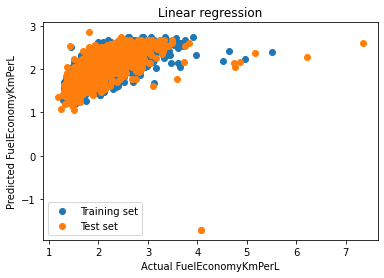

Text(0, 0.5, 'Predicted FuelEconomyKmPerL')

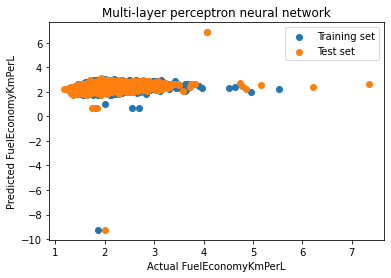

In [107]:

model = LinearRegression()#Create a linear regression model
model.fit(training_data_set[selected_variables], training_data_set['FuelEconomyKmPerL'])#Fit the model to the training set
training_data_set_correlation = np.corrcoef(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set
test_dat_set_correlation = np.corrcoef(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set
plt.scatter(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]), label='Training set')#Plot the model outputs against the target value for the training set
plt.scatter(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]), label='Test set')#Plot the model outputs against the target value for the test set
plt.legend()#Add a legend
plt.title('Linear regression')#Add a title
plt.xlabel('Actual FuelEconomyKmPerL')#Add a label to the x-axis
plt.ylabel('Predicted FuelEconomyKmPerL')#Add a label to the y-axis
plt.show()#Display the plot

model = MLPRegressor(hidden_layer_sizes=(16,), max_iter=1000)#Create a multi-layer perceptron neural network

model.fit(training_data_set[selected_variables], training_data_set['FuelEconomyKmPerL'])#Fit the model to the training set
training_data_set_correlation = np.corrcoef(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the training set
test_dat_set_correlation = np.corrcoef(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]))[0,1]#Calculate the correlation coefficient between the actual and predicted FuelEconomyKmPerL for the test set
plt.scatter(training_data_set['FuelEconomyKmPerL'], model.predict(training_data_set[selected_variables]), label='Training set')#Plot the model outputs against the target value for the training set
plt.scatter(test_set['FuelEconomyKmPerL'], model.predict(test_set[selected_variables]), label='Test set')#Plot the model outputs against the target value for the test set
plt.legend()#Add a legend
plt.title('Multi-layer perceptron neural network')#Add a title
plt.xlabel('Actual FuelEconomyKmPerL')#Add a label to the x-axis
plt.ylabel('Predicted FuelEconomyKmPerL')#Add a label to the y-axis
#Display the plot


10.	Construct histograms of FuelEconomyKmPerL and of the model errors ural models.  Display these histograms on 3 graphs with bars vertically aligned and that use the same x-axis limits. Comment on the ability of the models to reduce the uncertainty in fuel economy per trip. (4)

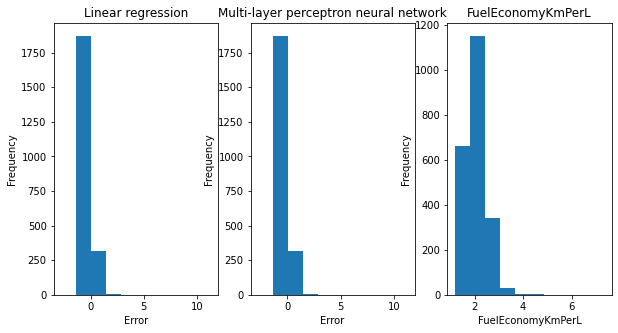

In [108]:
fig = plt.figure(figsize=(10, 5))#Create a figure
ax1 = fig.add_subplot(1, 3, 1)#Create a subplot for the linear regression model
ax1.hist(test_set['FuelEconomyKmPerL'] - model.predict(test_set[selected_variables]))#Plot the histogram of the linear regression model errors for the test set
ax1.set_title('Linear regression')#Add a title
ax1.set_xlabel('Error')#Add a label to the x-axis
ax1.set_ylabel('Frequency')#Add a label to the y-axis
ax2 = fig.add_subplot(1, 3, 2)#Create a subplot for the multi-layer perceptron neural network
ax2.hist(test_set['FuelEconomyKmPerL'] - model.predict(test_set[selected_variables]))#Plot the histogram of the multi-layer perceptron neural network errors for the test set
ax2.set_title('Multi-layer perceptron neural network')#Add a title
ax2.set_xlabel('Error')#Add a label to the x-axis
ax2.set_ylabel('Frequency')#Add a label to the y-axis
ax3 = fig.add_subplot(1, 3, 3)#Create a subplot for the FuelEconomyKmPerL
ax3.hist(test_set['FuelEconomyKmPerL'])#Plot the histogram of the FuelEconomyKmPerL
ax3.set_title('FuelEconomyKmPerL')#Add a title
ax3.set_xlabel('FuelEconomyKmPerL')#Add a label to the x-axis
ax3.set_ylabel('Frequency')#Add a label to the y-axis
plt.show()#Display the figure
